# Import - Standard Libraries

In [61]:
from matplotlib import pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns
import sklearn as sk
import statsmodels.api as sm
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from keras.models import Sequential
from keras.layers import Dense
from sklearn.preprocessing import MinMaxScaler
from imblearn.over_sampling import SMOTE
import tensorflow as tf
from scipy.stats import shapiro

# Import - Dataset

In [62]:
df ='/Users/bibekkhatri/Desktop/winequality-red.csv'
df = pd.read_csv(df)
# Random sample
df.sample()

fixed acidity  volatile acidity  citric acid  residual sugar  chlorides  \
981            9.5              0.86         0.26             1.9      0.079   

     free sulfur dioxide  total sulfur dioxide  density    pH  sulphates  \
981                 13.0                  28.0  0.99712  3.25       0.62   

     alcohol  quality  
981     10.0        5

In [63]:
# Print the first 5 rows of the dataframe.
print(df.head())

# Print the shape of the dataframe
print(df.shape)

print(df['quality'].describe())

   fixed acidity  volatile acidity  citric acid  residual sugar  chlorides  \
0            7.4              0.70         0.00             1.9      0.076   
1            7.8              0.88         0.00             2.6      0.098   
2            7.8              0.76         0.04             2.3      0.092   
3           11.2              0.28         0.56             1.9      0.075   
4            7.4              0.70         0.00             1.9      0.076   

   free sulfur dioxide  total sulfur dioxide  density    pH  sulphates  \
0                 11.0                  34.0   0.9978  3.51       0.56   
1                 25.0                  67.0   0.9968  3.20       0.68   
2                 15.0                  54.0   0.9970  3.26       0.65   
3                 17.0                  60.0   0.9980  3.16       0.58   
4                 11.0                  34.0   0.9978  3.51       0.56   

   alcohol  quality  
0      9.4        5  
1      9.8        5  
2      9.8        5 

# Data Analysis

The first steps performed by the paper was to do:

Pearson Correlation Analysis
Principal Component Analysis (PCA)
Shapiro-Wilk Normality Test

## Pearson Correlation Analysis

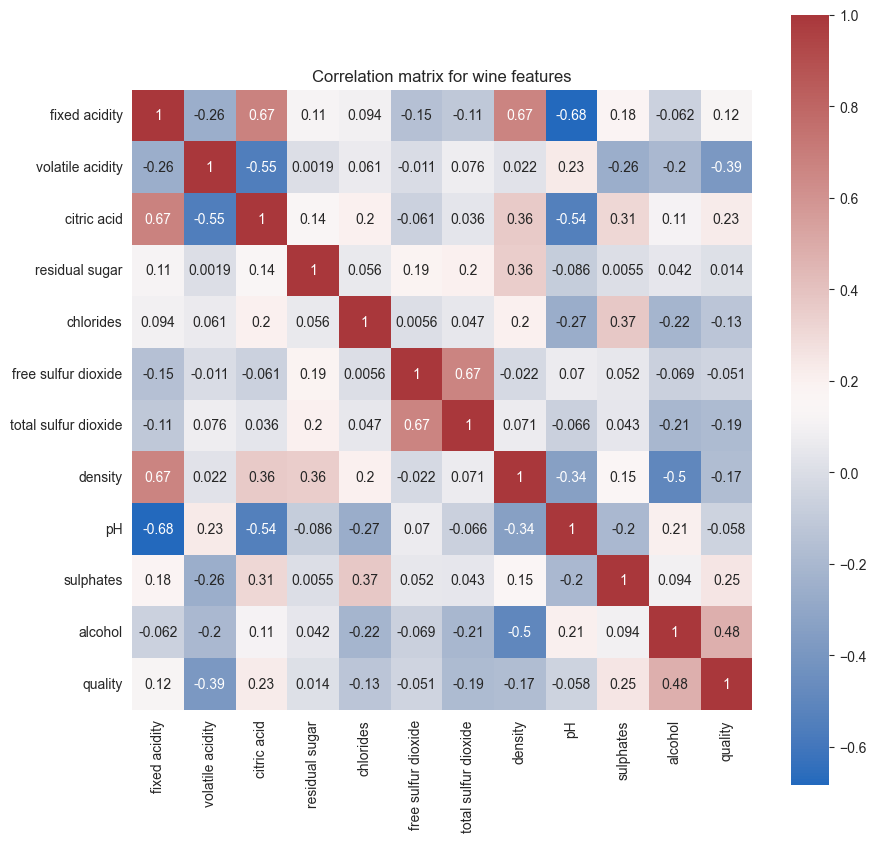

In [64]:
# Creat a correlation matrix for the wine dataset using the Pearson method
mat = df.corr(method='pearson', min_periods=1)

# Plot the correlation matrix
plt.figure(figsize=(10, 10))
sns.heatmap(mat, vmax=1, square=True, annot=True, cmap='vlag')
plt.title('Correlation matrix for wine features')
plt.show()

## Principal Component Analysis (PCA)

In [65]:
# Scale the dataset

scaler = StandardScaler()
X_scaled = scaler.fit_transform(df.iloc[:,:-1])

## Shapiro-Wilk Test

In [66]:

# Conduct a Shapiro-Wilk test for normality
# Null Hypothesis: The data is normally distributed
# Alternative Hypothesis: The data is not normally distributed
# Set alpha to 0.05
alpha = 0.05
for column in df.columns:
    stat, p = shapiro(df[column])
    print(column, ': Statistics=%.3f, p=%.3f' % (stat, p))
    # if p > alpha:
    #     print('The data is normally distributed (fail to reject H0)')
    # else:
    #     print('The data is not normally distributed (reject H0)')
    #print('\n')

fixed acidity : Statistics=0.942, p=0.000
volatile acidity : Statistics=0.974, p=0.000
citric acid : Statistics=0.955, p=0.000
residual sugar : Statistics=0.566, p=0.000
chlorides : Statistics=0.484, p=0.000
free sulfur dioxide : Statistics=0.902, p=0.000
total sulfur dioxide : Statistics=0.873, p=0.000
density : Statistics=0.991, p=0.000
pH : Statistics=0.993, p=0.000
sulphates : Statistics=0.833, p=0.000
alcohol : Statistics=0.929, p=0.000
quality : Statistics=0.858, p=0.000


# Implement the Neural Network

## Mess around with ordering

(12, 12)


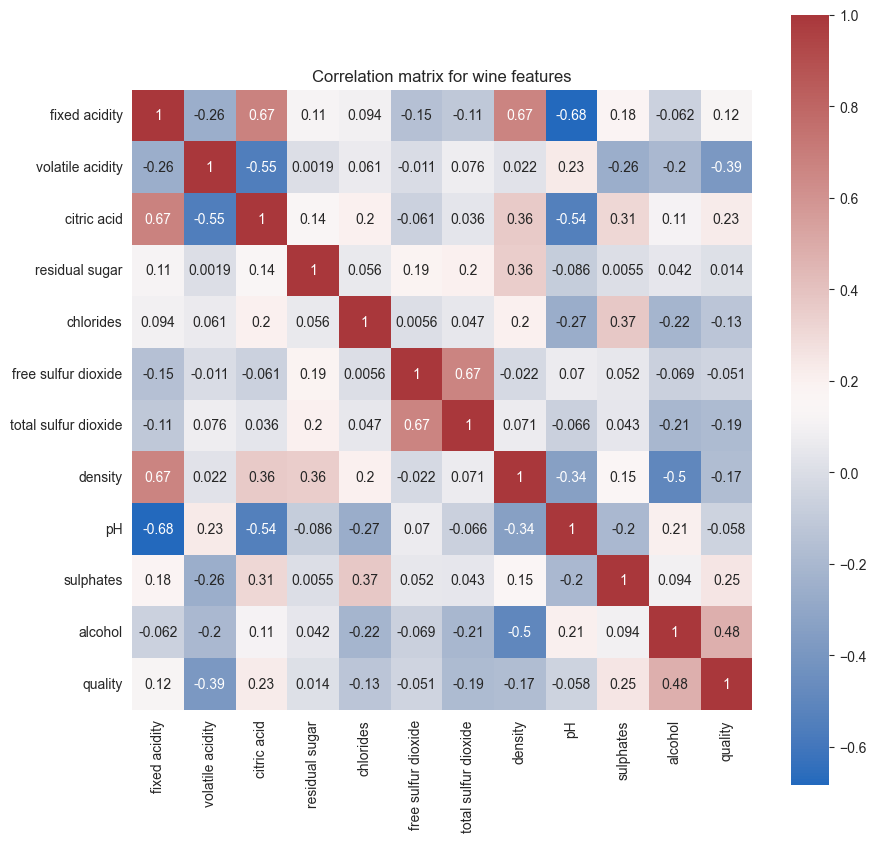

In [67]:
# Creat a correlation matrix for the wine dataset using the Pearson method
mat = df.corr(method='pearson', min_periods=1)

print(mat.shape)
# Plot the correlation matrix
plt.figure(figsize=(10, 10))
sns.heatmap(mat, vmax=1, square=True, annot=True, cmap='vlag')
plt.title('Correlation matrix for wine features')
plt.show()

# Rename Columns

In [68]:

df = df.rename(columns={'fixed acidity': 'Fixed Acidity', 'volatile acidity': 'Volatile Acidity', 'citric acid': 'Citric Acid',
                        'residual sugar': 'Residual Sugar', 'chlorides': 'Chlorides', 'free sulfur dioxide': 'Free Sulfur Dioxide', 'total sulfur dioxide':'Total Sulfur Dioxide',
                        'density': 'Density', 'pH': 'pH', 'sulphates': 'Sulphates', 'alcohol': 'Alcohol', 'quality': 'Quality'})
df

Fixed Acidity  Volatile Acidity  Citric Acid  Residual Sugar  Chlorides  \
0               7.4             0.700         0.00             1.9      0.076   
1               7.8             0.880         0.00             2.6      0.098   
2               7.8             0.760         0.04             2.3      0.092   
3              11.2             0.280         0.56             1.9      0.075   
4               7.4             0.700         0.00             1.9      0.076   
...             ...               ...          ...             ...        ...   
1594            6.2             0.600         0.08             2.0      0.090   
1595            5.9             0.550         0.10             2.2      0.062   
1596            6.3             0.510         0.13             2.3      0.076   
1597            5.9             0.645         0.12             2.0      0.075   
1598            6.0             0.310         0.47             3.6      0.067   

      Free Sulfur Dioxide  Total Sulfur Dioxide  Density    pH  Sulphates  \
0                    11.0                  34.0  0.99780  3.51       0.56   
1                    25.0                  67.0  0.99680  3.20       0.68   
2                    15.0                  54.0  0.99700  3.26       0.65   
3                    17.0                  60.0  0.99800  3.16       0.58   
4                    11.0                  34.0  0.99780  3.51       0.56   
...                   ...                   ...      ...   ...        ...   
1594                 32.0                  44.0  0.99490  3.45       0.58   
1595                 39.0                  51.0  0.99512  3.52       0.76   
1596                 29.0                  40.0  0.99574  3.42       0.75   
1597                 32.0                  44.0  0.99547  3.57       0.71   
1598                 18.0                  42.0  0.99549  3.39       0.66   

      Alcohol  Quality  
0         9.4        5  
1         9.8        5  
2         9.8        5  
3         9.8        6  
4         9.4        5  
...       ...      ...  
1594     10.5        5  
1595     11.2        6  
1596     11.0        6  
1597     10.2        5  
1598     11.0        6  

[1599 rows x 12 columns]

# Checking Null Value of Dataset

In [69]:
df.info()
df.isnull().any()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1599 entries, 0 to 1598
Data columns (total 12 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Fixed Acidity         1599 non-null   float64
 1   Volatile Acidity      1599 non-null   float64
 2   Citric Acid           1599 non-null   float64
 3   Residual Sugar        1599 non-null   float64
 4   Chlorides             1599 non-null   float64
 5   Free Sulfur Dioxide   1599 non-null   float64
 6   Total Sulfur Dioxide  1599 non-null   float64
 7   Density               1599 non-null   float64
 8   pH                    1599 non-null   float64
 9   Sulphates             1599 non-null   float64
 10  Alcohol               1599 non-null   float64
 11  Quality               1599 non-null   int64  
dtypes: float64(11), int64(1)
memory usage: 150.0 KB


Fixed Acidity           False
Volatile Acidity        False
Citric Acid             False
Residual Sugar          False
Chlorides               False
Free Sulfur Dioxide     False
Total Sulfur Dioxide    False
Density                 False
pH                      False
Sulphates               False
Alcohol                 False
Quality                 False
dtype: bool

# Exploratory Data Analysis (EDA)

In [70]:
# Univariate Analysis
df.describe()

Fixed Acidity  Volatile Acidity  Citric Acid  Residual Sugar  \
count    1599.000000       1599.000000  1599.000000     1599.000000   
mean        8.319637          0.527821     0.270976        2.538806   
std         1.741096          0.179060     0.194801        1.409928   
min         4.600000          0.120000     0.000000        0.900000   
25%         7.100000          0.390000     0.090000        1.900000   
50%         7.900000          0.520000     0.260000        2.200000   
75%         9.200000          0.640000     0.420000        2.600000   
max        15.900000          1.580000     1.000000       15.500000   

         Chlorides  Free Sulfur Dioxide  Total Sulfur Dioxide      Density  \
count  1599.000000          1599.000000           1599.000000  1599.000000   
mean      0.087467            15.874922             46.467792     0.996747   
std       0.047065            10.460157             32.895324     0.001887   
min       0.012000             1.000000              6.000000     0.990070   
25%       0.070000             7.000000             22.000000     0.995600   
50%       0.079000            14.000000             38.000000     0.996750   
75%       0.090000            21.000000             62.000000     0.997835   
max       0.611000            72.000000            289.000000     1.003690   

                pH    Sulphates      Alcohol      Quality  
count  1599.000000  1599.000000  1599.000000  1599.000000  
mean      3.311113     0.658149    10.422983     5.636023  
std       0.154386     0.169507     1.065668     0.807569  
min       2.740000     0.330000     8.400000     3.000000  
25%       3.210000     0.550000     9.500000     5.000000  
50%       3.310000     0.620000    10.200000     6.000000  
75%       3.400000     0.730000    11.100000     6.000000  
max       4.010000     2.000000    14.900000     8.000000

<Axes: >

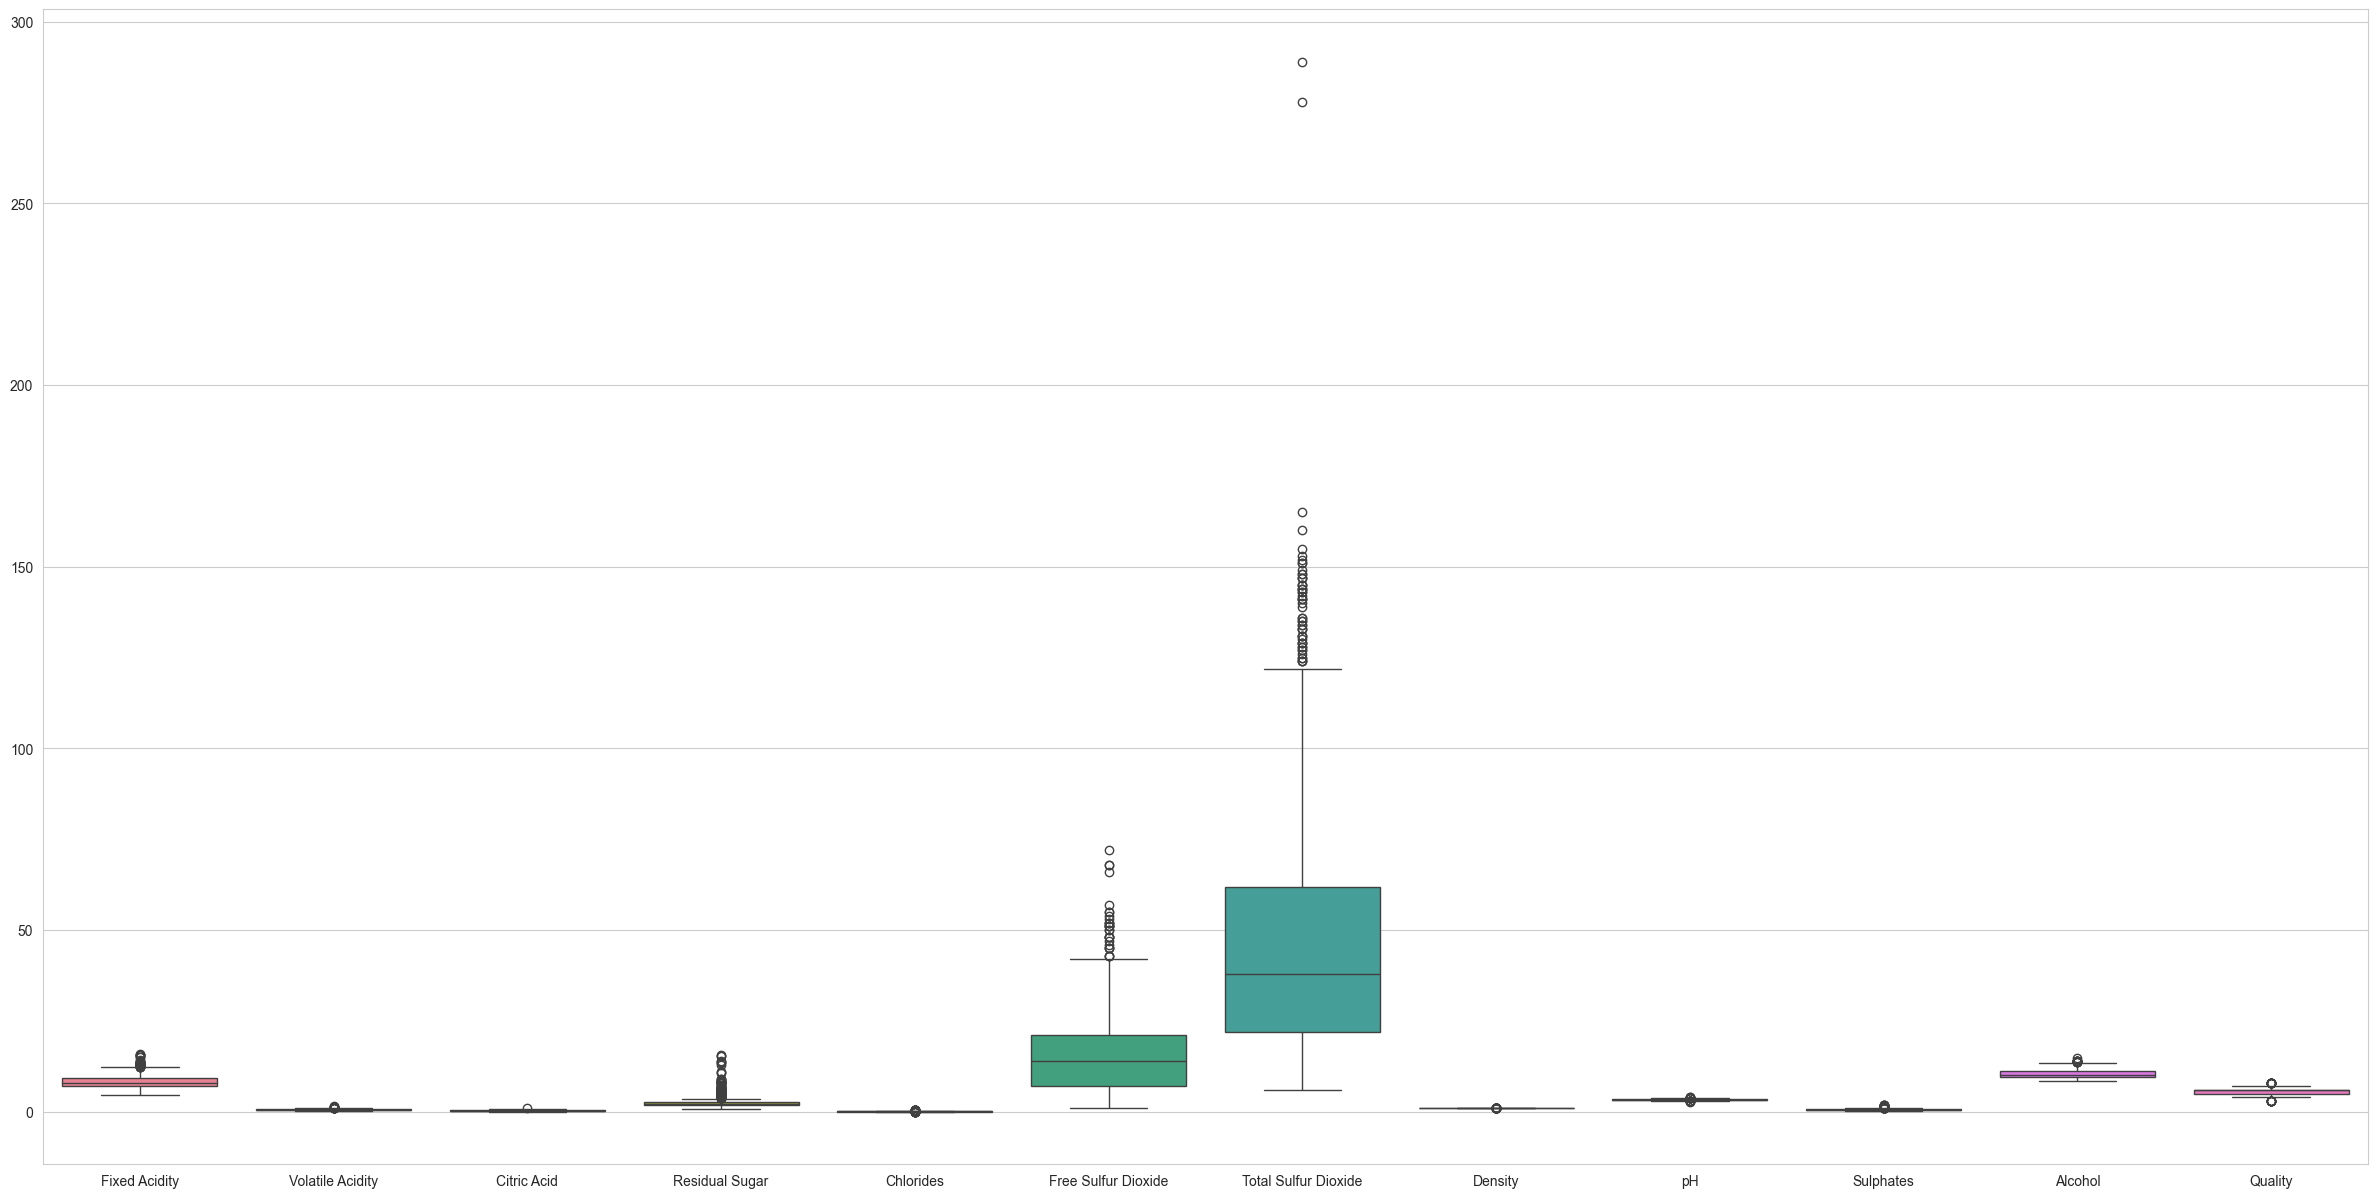

In [71]:
plt.figure(figsize=(30, 15))
sns.boxplot(data=df)

<Axes: >

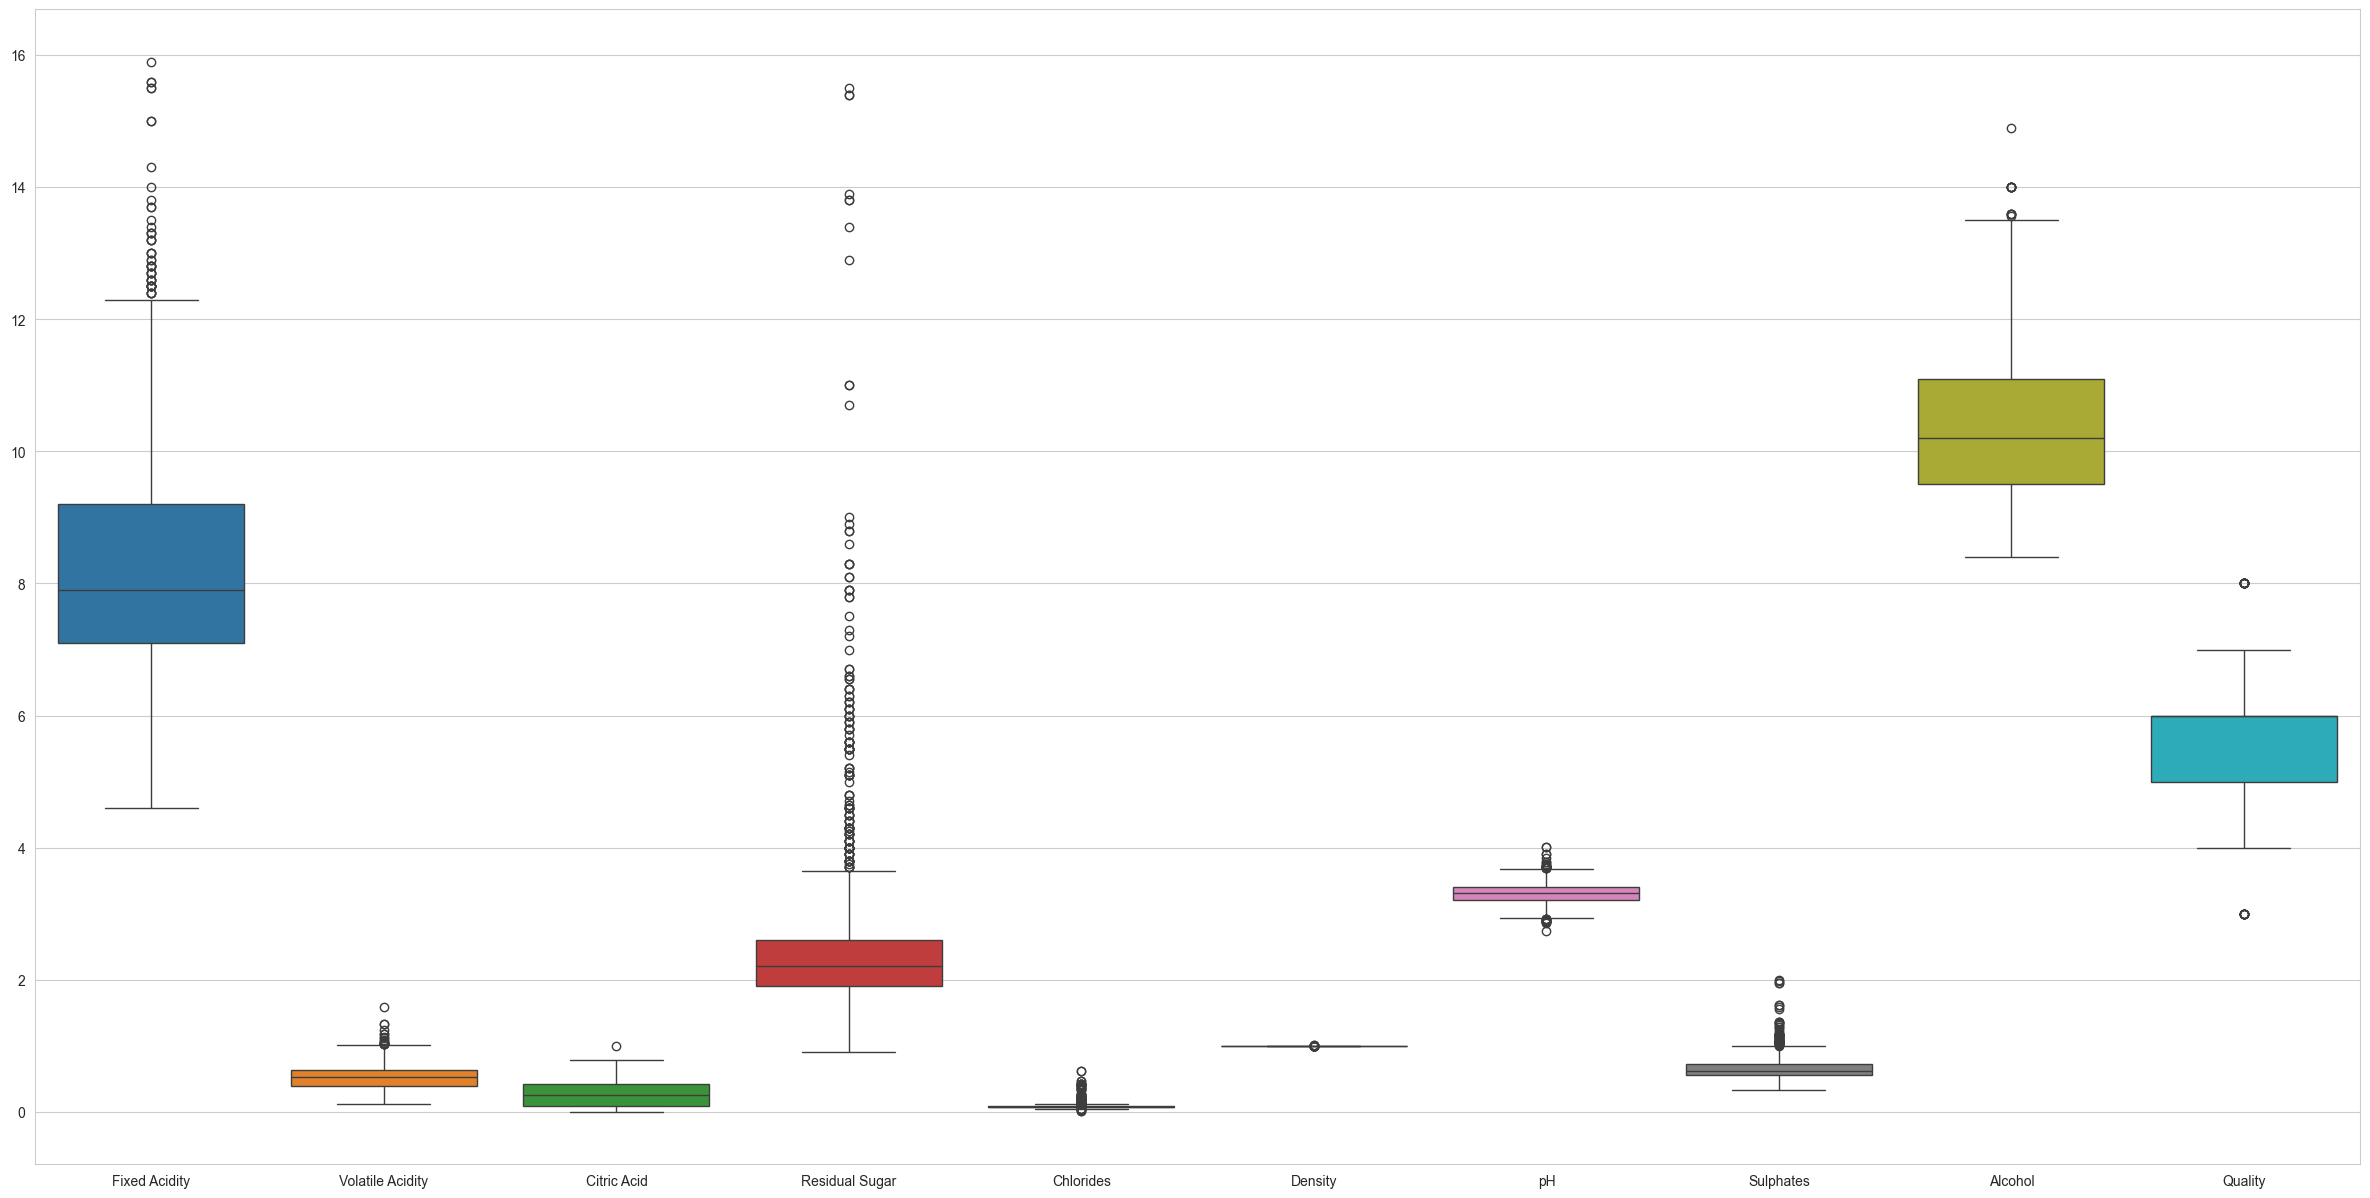

In [72]:
plt.figure(figsize=(30, 15))
zoom = df[['Fixed Acidity', 'Volatile Acidity', 'Citric Acid', 'Residual Sugar', 'Chlorides', 'Density', 'pH', 'Sulphates', 'Alcohol', 'Quality']]
sns.boxplot(data=zoom)

<Figure size 3000x1500 with 0 Axes>

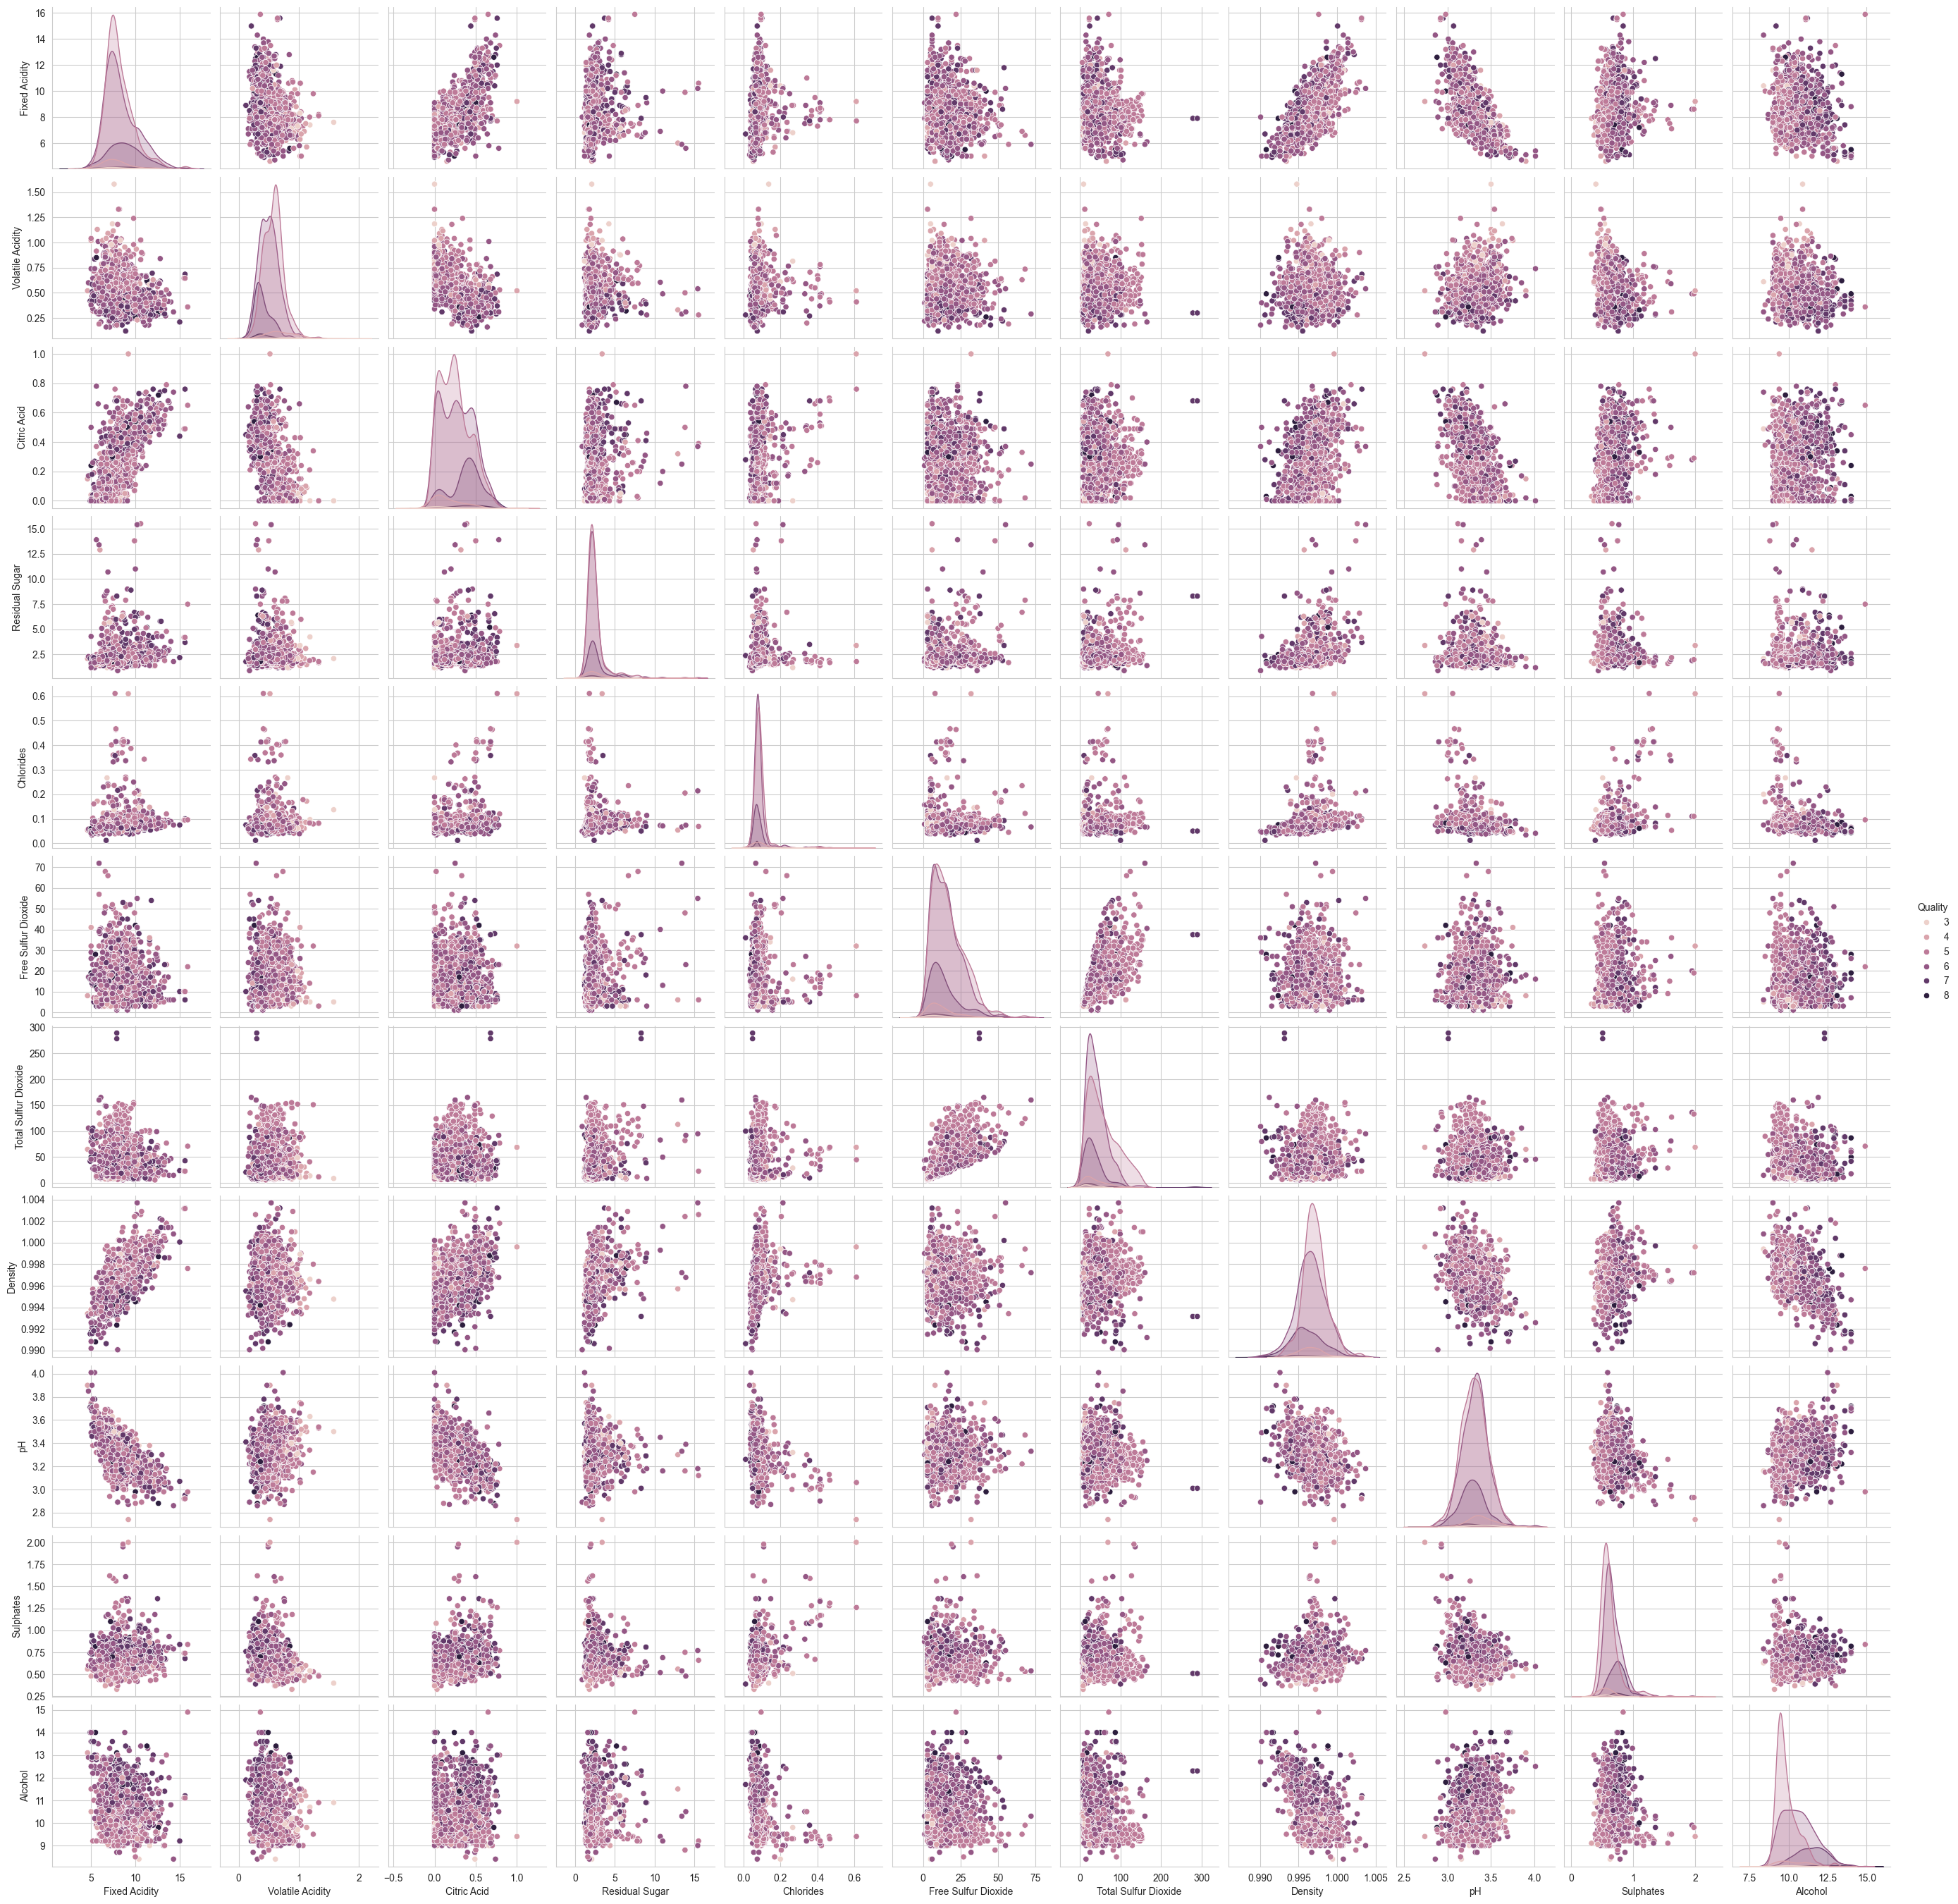

In [73]:
# Multivariate Analysis
plt.figure(figsize=(30, 15))
sns.pairplot(data=df, hue='Quality')
plt.show()

# Heatmap

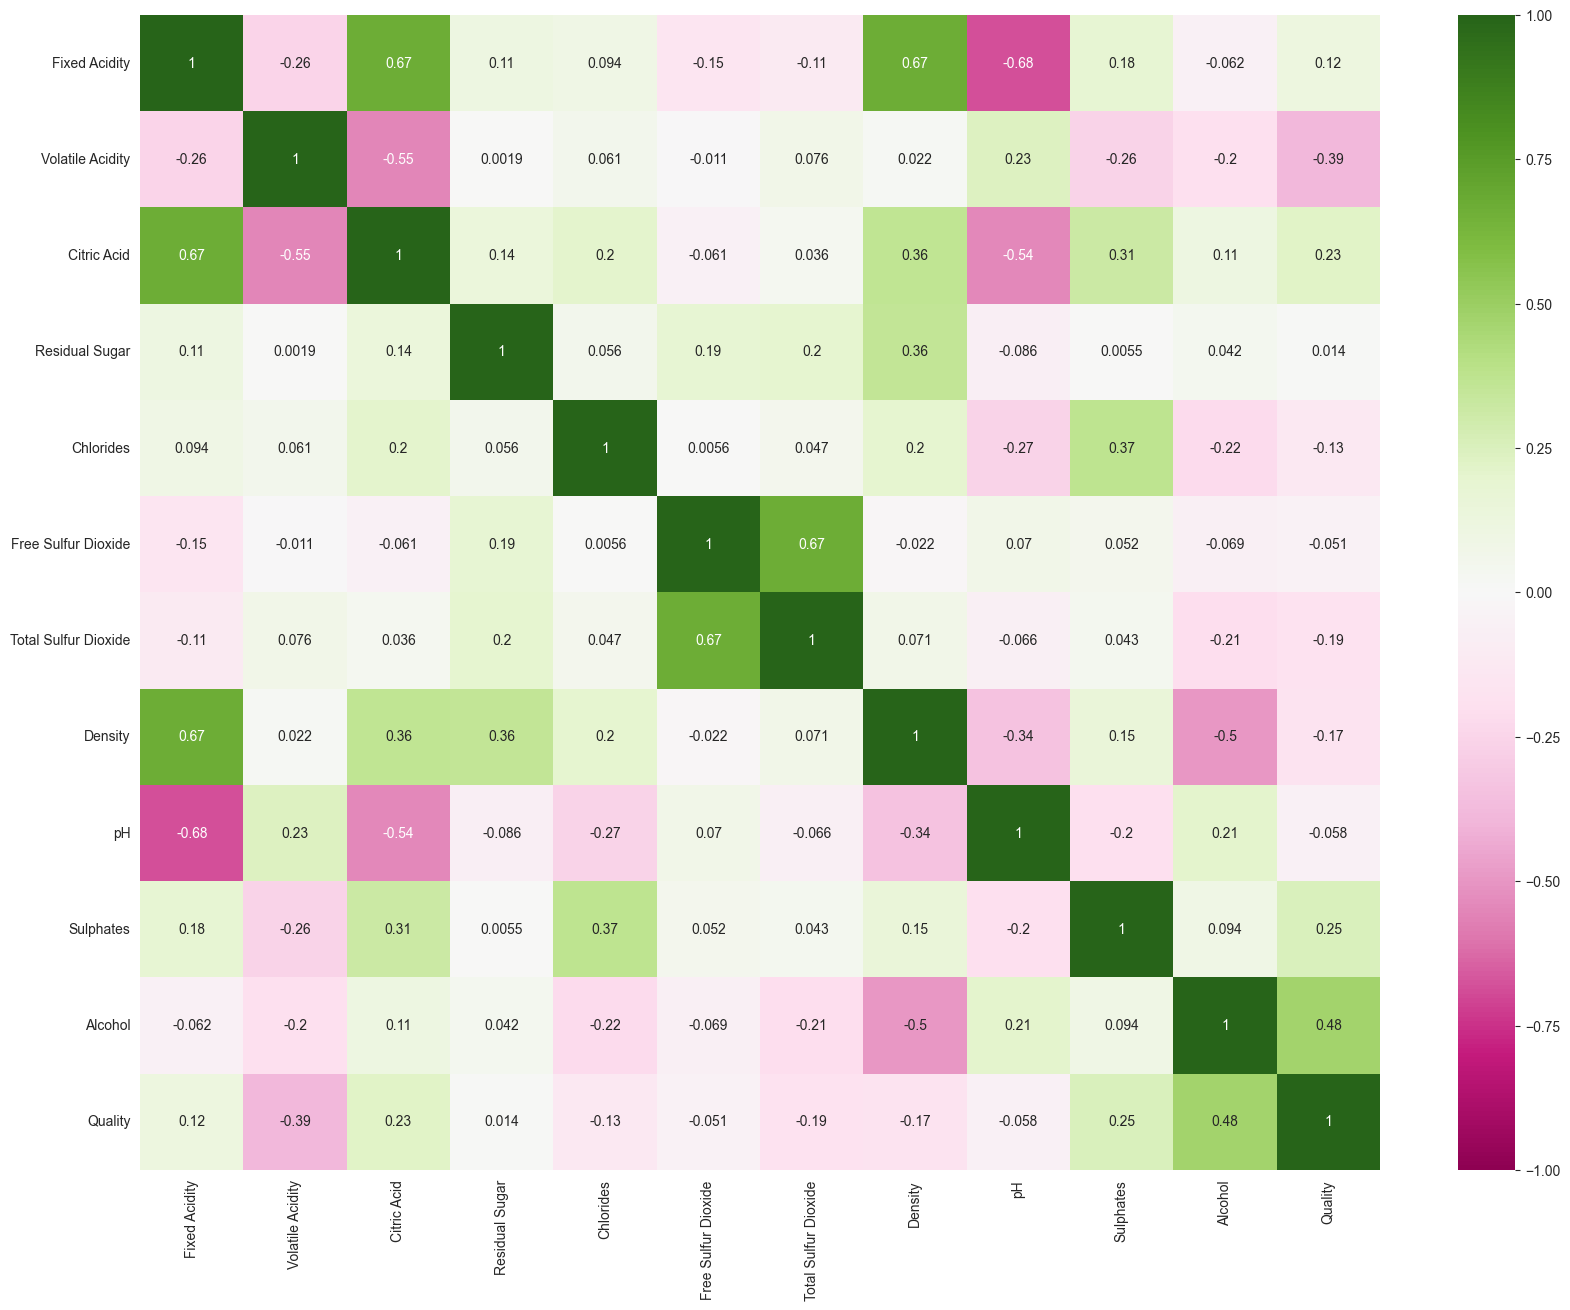

In [80]:
# Heatmap
plt.figure(figsize=(20, 15))
sns.heatmap(df.corr(), vmin=-1, vmax=1, cmap="PiYG", annot=True)
plt.show()

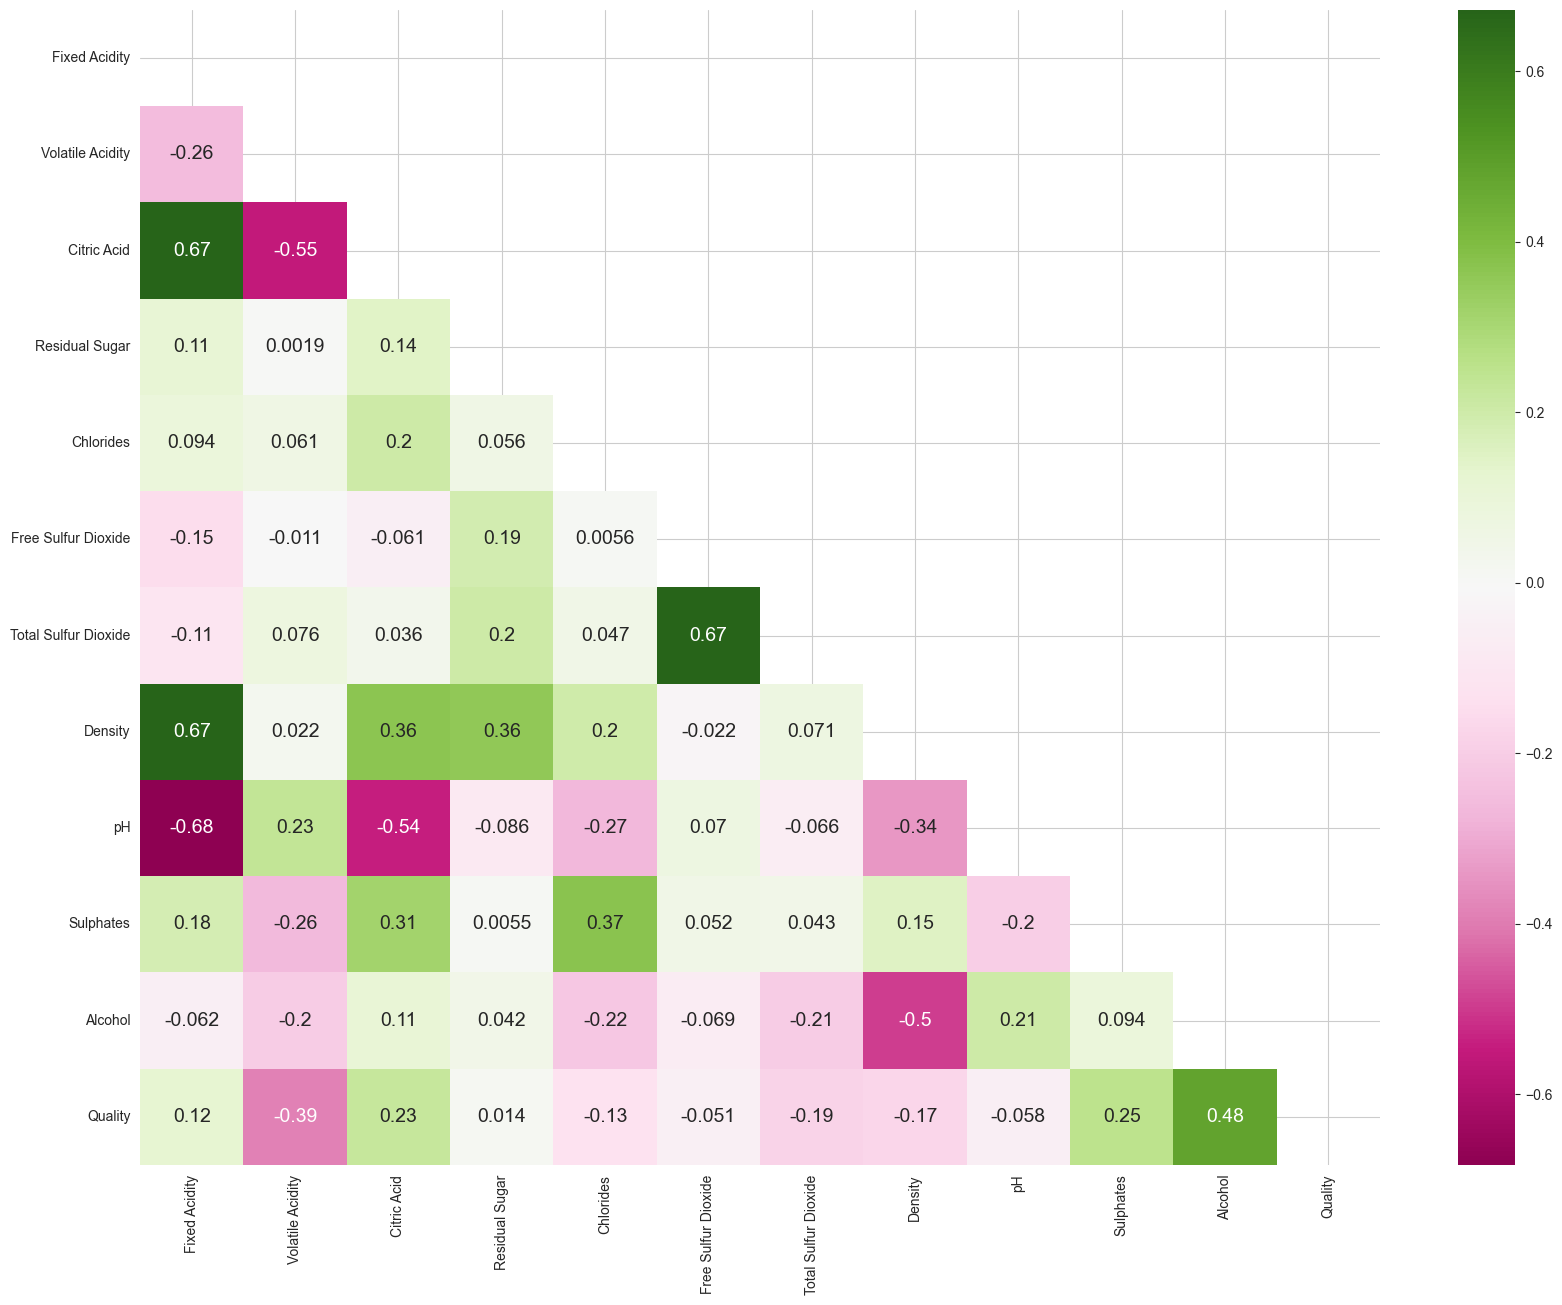

In [82]:
# Heatmap other display
# Creates an array of zeros
zero = np.zeros_like(df.corr())
triangle_indices = np.triu_indices_from(zero)
zero[triangle_indices] = True
# Check the relationship between all the features with the target (Quality)
plt.figure(figsize=(20,15))
sns.heatmap(df.corr(), mask=zero, cmap="PiYG", annot=True, annot_kws={'size': 14})
sns.set_style('whitegrid')
plt.xticks(fontsize=10)
plt.yticks(fontsize=10)
plt.show()
# In order of highest correlation (to Quality): Alcohol, Volatile Acidity, Sulphates, Citric Acid, Total Sulfur Dioxide, Density, Chlorides, Fixed Acidity, pH, Free Sulfur Dioxide, Residual Sugar
     


# Independent Variables & Dependent Variables

In [83]:
# Use this code
# x = df[['Fixed Acidity', 'Volatile Acidity', 'Citric Acid', 'Residual Sugar', 'Chlorides', 'Free Sulfur Dioxide', 'Total Sulfur Dioxide', 'Density', 'pH', 'Sulphates', 'Alcohol']]
# y = df[['Quality']]
# Or this
x = df.iloc[:, :-1].values
y = df.iloc[:, -1].values
# Splitting dataset into training set & test set
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.2, random_state = 0)

In [84]:

# Fitting Multiple Linear Regression to the training set
regr = LinearRegression()
regr.fit(x_train, y_train)

LinearRegression()

# Prediction

In [85]:
# Test prediction (From Fixed Acidity, Volatile Acidity, Citric Acid, Residual Sugar, Chlorides, Free Sulfur Dioxide, Total Sulfur Dioxide, Density, pH, Sulphates, Alcohol)
print(regr.predict([[15, 0.01, 0, 5, 0.001, 30, 50, 0.95, 3, 0.9, 15]]))
# Quality: 9.82988592 (9 out of 10)

[9.82988592]


# Backward Elimination

In [86]:

# Building the optimal model using Backward Elimination
x = np.append(arr = np.ones((1599, 1)).astype(int), values = x, axis = 1)
# Choose a Significance level usually 0.05, if p > 0.05
# For the highest values parameter, remove that value
x_opt = x[:, [0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10]]
ols = sm.OLS(endog = y, exog = x_opt).fit()
ols.summary()
     

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      y   R-squared:                       0.317
Model:                            OLS   Adj. R-squared:                  0.312
Method:                 Least Squares   F-statistic:                     73.61
Date:                Sat, 28 Oct 2023   Prob (F-statistic):          7.94e-124
Time:                        20:13:09   Log-Likelihood:                -1622.1
No. Observations:                1599   AIC:                             3266.
Df Residuals:                    1588   BIC:                             3325.
Df Model:                          10                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const        189.6787     14.266     13.295      0.000     161.696     217.662
x1             0.1720      0.023      7.643      0.000       0.128       0.216
x2            -0.9839      0.125     -7.887      0.000      -1.229      -0.739
x3             0.0469      0.150      0.312      0.755      -0.248       0.342
x4             0.0949      0.013      7.077      0.000       0.069       0.121
x5            -2.2780      0.431     -5.280      0.000      -3.124      -1.432
x6             0.0038      0.002      1.681      0.093      -0.001       0.008
x7            -0.0039      0.001     -5.195      0.000      -0.005      -0.002
x8          -188.4014     14.638    -12.871      0.000    -217.113    -159.690
x9             0.6255      0.169      3.699      0.000       0.294       0.957
x10            1.2607      0.113     11.145      0.000       1.039       1.483
==============================================================================
Omnibus:                       29.835   Durbin-Watson:                   1.791
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               48.661
Skew:                          -0.152   Prob(JB):                     2.71e-11
Kurtosis:                       3.799   Cond. No.                     7.32e+04
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 7.32e+04. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [87]:

# Deleted x3 (0.755) [Residual Sugar]
x_opt = x[:, [0, 1, 2, 4, 5, 6, 7, 8, 9, 10]]
ols = sm.OLS(endog = y, exog = x_opt).fit()
ols.summary()
     

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      y   R-squared:                       0.317
Model:                            OLS   Adj. R-squared:                  0.313
Method:                 Least Squares   F-statistic:                     81.83
Date:                Sat, 28 Oct 2023   Prob (F-statistic):          8.94e-125
Time:                        20:13:13   Log-Likelihood:                -1622.2
No. Observations:                1599   AIC:                             3264.
Df Residuals:                    1589   BIC:                             3318.
Df Model:                           9                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const        190.3898     14.079     13.523      0.000     162.775     218.005
x1             0.1755      0.019      9.004      0.000       0.137       0.214
x2            -1.0046      0.106     -9.508      0.000      -1.212      -0.797
x3             0.0955      0.013      7.208      0.000       0.070       0.122
x4            -2.2439      0.417     -5.379      0.000      -3.062      -1.426
x5             0.0037      0.002      1.652      0.099      -0.001       0.008
x6            -0.0038      0.001     -5.294      0.000      -0.005      -0.002
x7          -189.1366     14.442    -13.096      0.000    -217.465    -160.809
x8             0.6282      0.169      3.721      0.000       0.297       0.959
x9             1.2633      0.113     11.201      0.000       1.042       1.485
==============================================================================
Omnibus:                       30.011   Durbin-Watson:                   1.792
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               49.226
Skew:                          -0.150   Prob(JB):                     2.04e-11
Kurtosis:                       3.805   Cond. No.                     7.22e+04
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 7.22e+04. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [88]:
# Deleted x5 (0.125) [Total Sulfur Dioxide]
x_opt = x[:, [0, 1, 2, 4, 5, 7, 8, 9, 10]]
ols = sm.OLS(endog = y, exog = x_opt).fit()
ols.summary()
# This means that Alcohol, Volatile Acidity, Sulphates, Citric Acid, Density, Chlorides, Fixed Acidity, pH, & Free Sulfur Dioxide having the highest impact on the quality of Red Wine
     

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      y   R-squared:                       0.316
Model:                            OLS   Adj. R-squared:                  0.312
Method:                 Least Squares   F-statistic:                     91.61
Date:                Sat, 28 Oct 2023   Prob (F-statistic):          3.49e-125
Time:                        20:13:15   Log-Likelihood:                -1623.6
No. Observations:                1599   AIC:                             3265.
Df Residuals:                    1590   BIC:                             3314.
Df Model:                           8                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const        192.0600     14.050     13.670      0.000     164.502     219.618
x1             0.1767      0.019      9.063      0.000       0.138       0.215
x2            -1.0210      0.105     -9.701      0.000      -1.227      -0.815
x3             0.0979      0.013      7.427      0.000       0.072       0.124
x4            -2.2305      0.417     -5.345      0.000      -3.049      -1.412
x5            -0.0031      0.001     -5.572      0.000      -0.004      -0.002
x6          -190.9319     14.409    -13.251      0.000    -219.195    -162.669
x7             0.6669      0.167      3.986      0.000       0.339       0.995
x8             1.2701      0.113     11.264      0.000       1.049       1.491
==============================================================================
Omnibus:                       30.611   Durbin-Watson:                   1.789
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               49.853
Skew:                          -0.158   Prob(JB):                     1.49e-11
Kurtosis:                       3.805   Cond. No.                     6.90e+04
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 6.9e+04. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

# Evaluation

In [89]:

# Ordinary Least Square (OLS) Principle
x = sm.add_constant(x_train)
model = sm.OLS(y_train, x).fit()
print(model.summary())
     

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.365
Model:                            OLS   Adj. R-squared:                  0.360
Method:                 Least Squares   F-statistic:                     66.34
Date:                Sat, 28 Oct 2023   Prob (F-statistic):          6.26e-117
Time:                        20:13:20   Log-Likelihood:                -1268.8
No. Observations:                1279   AIC:                             2562.
Df Residuals:                    1267   BIC:                             2624.
Df Model:                          11                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         34.9987     23.831      1.469      0.1

In [90]:

# Evaluate our model using MSE criterion
y_pred = regr.predict(x_test)
print("Mean Squared Error (MSE): ", mean_squared_error(y_test, y_pred))
     

Mean Squared Error (MSE):  0.38447119782012346


In [91]:

# Check quality value from dataset that is listed
print(df['Quality'].unique())
     

[5 6 7 4 8 3]


In [92]:
# MAPE
def mape(actual, pred):
  actual, pred = np.array(actual), np.array(pred)
  return np.mean(np.abs((actual - pred) / actual)) * 100
     

In [93]:
mape(y_test, y_pred)
# Error of our model is approximately 8-9% (Excellent)
# MAPE result Notes : 
# 1. Below 10% = Excellent
# 2. 10% - 20% = Good
# 3. 21% - 50% = Reasonable
# 4. Above 50% = Inaccurate

8.781960464319909

In [94]:
# Create the test and train data from the sorted data


# Create the features (X) and target (y) data
X = df.drop('Quality', axis=1)
y = df['Quality']

# Split the data into train and test sets
X_train, X_test, y_train, y_test = train_test_split(np.asarray(X), np.asarray(y), random_state=24)

# Scale the X_train and X_test data
scaler = MinMaxScaler()

# Fit the scaler
X_scaler = scaler.fit(X_train)

# Scale the data
X_train_scaled = X_scaler.transform(X_train)
X_test_scaled = X_scaler.transform(X_test)

# # Create the SMOTE oversampling object
# smote = SMOTE(random_state=78)

# # Fit the SMOTE model to the data
# X_train_smote, y_train_smote = smote.fit_resample(X_train_scaled, y_train)

# # Combine the X_train smote and X_train scaled data
# X_train = np.concatenate((X_train_scaled, X_train_smote))
# y_train = np.concatenate((y_train, y_train_smote))



X_train_d = tf.expand_dims(X_train_scaled, axis=-1)
X_test_d = tf.expand_dims(X_test_scaled, axis=-1)
print(X_train_d.shape)

# Convert class vectors to binary class matrices. This uses 1 hot encoding.
y_train_binary = tf.keras.utils.to_categorical(y_train, 10)
y_test_binary = tf.keras.utils.to_categorical(y_test, 10)

print(y_train_binary.shape)
print(y_test_binary)

(1199, 11, 1)
(1199, 10)
[[0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]]


# Create the Neural Network

## With Convolution 

1DCNN

In [95]:
tf.keras.backend.clear_session()
tf.random.set_seed(42)

# create sequential model
model = tf.keras.models.Sequential([
    tf.keras.layers.Conv1D(32, 3, activation='relu', input_shape=X_train_d.shape[1:]),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(200, activation='relu'), # First Dense layer
    tf.keras.layers.Dropout(0.4), # First Dropout layer
    tf.keras.layers.BatchNormalization(), # First Batch normalization layer
    tf.keras.layers.Dense(200, activation='relu'), # Second Dense layer
    tf.keras.layers.Dropout(0.4), # Second Dropout layer
    tf.keras.layers.BatchNormalization(), # Second Batch normalization layer
    tf.keras.layers.Dense(200, activation='relu'), # Third Dense layer
    tf.keras.layers.Dropout(0.4), # Third Dropout layer
    tf.keras.layers.BatchNormalization(), # Third Batch normalization layer
    tf.keras.layers.Dense(200, activation='relu'), # Fourth Dense layer
    tf.keras.layers.Dense(10, activation='softmax')
])

1DCNN-D

In [96]:
tf.keras.backend.clear_session()
tf.random.set_seed(42)

# create sequential model
model = tf.keras.models.Sequential([
    tf.keras.layers.Conv1D(64, 3, activation='relu', input_shape=X_train_d.shape[1:]),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(120, activation='relu'), # First Dense layer
    tf.keras.layers.Dense(120, activation='relu'), # Second Dense layer
    tf.keras.layers.Dense(120, activation='relu'), # Third Dense layer
    tf.keras.layers.Dense(120, activation='relu'), # Fourth Dense layer
    tf.keras.layers.Dense(10, activation='softmax')
])

In [97]:
# compile model
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

# fit model
history = model.fit(X_train_d, y_train_binary, epochs=50, batch_size=10, validation_data=(X_test_d, y_test_binary))

Epoch 1/50
120/120 [==============================] - 1s 3ms/step - loss: 1.3365 - accuracy: 0.3962 - val_loss: 1.1978 - val_accuracy: 0.4725
Epoch 2/50
120/120 [==============================] - 0s 2ms/step - loss: 1.0802 - accuracy: 0.5271 - val_loss: 1.0946 - val_accuracy: 0.5325
Epoch 3/50
120/120 [==============================] - 0s 2ms/step - loss: 0.9719 - accuracy: 0.5880 - val_loss: 1.0959 - val_accuracy: 0.5100
Epoch 4/50
120/120 [==============================] - 0s 2ms/step - loss: 0.9453 - accuracy: 0.5972 - val_loss: 1.0711 - val_accuracy: 0.5525
Epoch 5/50
120/120 [==============================] - 0s 2ms/step - loss: 0.9630 - accuracy: 0.5913 - val_loss: 1.0690 - val_accuracy: 0.5575
Epoch 6/50
120/120 [==============================] - 0s 2ms/step - loss: 0.9258 - accuracy: 0.6072 - val_loss: 1.0821 - val_accuracy: 0.5600
Epoch 7/50
120/120 [==============================] - 0s 2ms/step - loss: 0.9366 - accuracy: 0.5813 - val_loss: 1.0808 - val_accuracy: 0.5400
Epoch 

## No Convolution 

DNN-D

In [98]:
tf.keras.backend.clear_session()
tf.random.set_seed(42)

# create sequential model
model = tf.keras.models.Sequential([
    tf.keras.layers.Dense(16, activation='relu'), # First Dense layer
    tf.keras.layers.Dropout(0.2), # First Dropout layer
    tf.keras.layers.BatchNormalization(), # First Batch normalization layer
    tf.keras.layers.Dense(16, activation='relu'), # Second Dense layer
    tf.keras.layers.Dropout(0.2), # Second Dropout layer
    tf.keras.layers.BatchNormalization(), # Second Batch normalization layer
    tf.keras.layers.Dense(16, activation='relu'), # Third Dense layer
    tf.keras.layers.Dropout(0.2), # Third Dropout layer
    tf.keras.layers.BatchNormalization(), # Third Batch normalization layer
    tf.keras.layers.Dense(16, activation='relu'), # Fourth Dense layer
    tf.keras.layers.Dense(10, activation='softmax')
])


In [99]:
tf.keras.backend.clear_session()
tf.random.set_seed(42)

# create sequential model
model = tf.keras.models.Sequential([
    tf.keras.layers.Dense(16, activation='relu'), # First Dense layer
    tf.keras.layers.Dense(16, activation='relu'), # Second Dense layer
    tf.keras.layers.Dense(16, activation='relu'), # Third Dense layer
    tf.keras.layers.Dense(16, activation='relu'), # Fourth Dense layer
    tf.keras.layers.Dense(10, activation='softmax')
])

In [100]:
# compile model
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

# fit model
history = model.fit(X_train_scaled, y_train_binary, epochs=30, batch_size=2, validation_data=(X_test_scaled, y_test_binary))

Epoch 1/30
600/600 [==============================] - 1s 1ms/step - loss: 1.3359 - accuracy: 0.4646 - val_loss: 1.1664 - val_accuracy: 0.5400
Epoch 2/30
600/600 [==============================] - 1s 1ms/step - loss: 1.0459 - accuracy: 0.5613 - val_loss: 1.1075 - val_accuracy: 0.5175
Epoch 3/30
600/600 [==============================] - 1s 1ms/step - loss: 0.9786 - accuracy: 0.5888 - val_loss: 1.0903 - val_accuracy: 0.5425
Epoch 4/30
600/600 [==============================] - 1s 1ms/step - loss: 0.9581 - accuracy: 0.5972 - val_loss: 1.0878 - val_accuracy: 0.5400
Epoch 5/30
600/600 [==============================] - 1s 1ms/step - loss: 0.9468 - accuracy: 0.5938 - val_loss: 1.0773 - val_accuracy: 0.5475
Epoch 6/30
600/600 [==============================] - 1s 1ms/step - loss: 0.9343 - accuracy: 0.6105 - val_loss: 1.0749 - val_accuracy: 0.5775
Epoch 7/30
600/600 [==============================] - 1s 1ms/step - loss: 0.9210 - accuracy: 0.6005 - val_loss: 1.0861 - val_accuracy: 0.5275
Epoch 

## Evaluate Model 

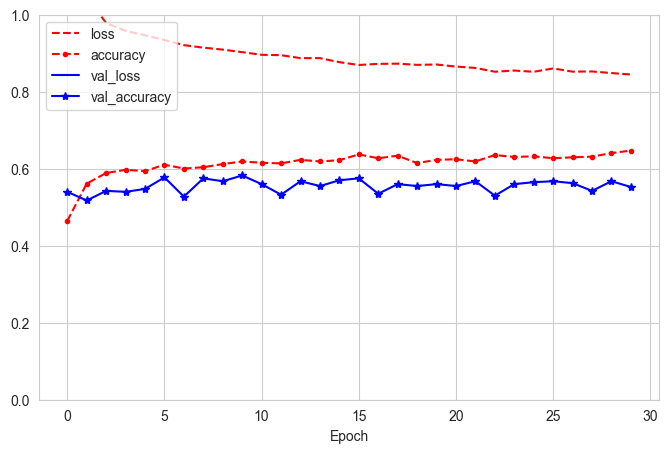

13/13 [==============================] - 0s 793us/step


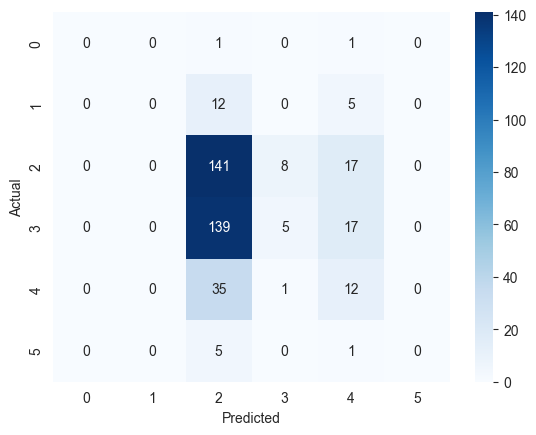

In [101]:
# Plot History of model and metrics


pd.DataFrame(history.history).plot(
    figsize=(8, 5), grid=True, xlabel="Epoch", ylim=(0, 1),
    style=["r--", "r--.", "b-", "b-*"])
plt.legend(loc='upper left')
plt.show()

# Evaluate model on test data
model.evaluate(X_test, y_test_binary)

# Predict on test data
y_pred = model.predict(X_test)

# Plot confusion matrix
from sklearn.metrics import confusion_matrix
import seaborn as sns

cm = confusion_matrix(y_test_binary.argmax(axis=1), y_pred.argmax(axis=1))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()